In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
Consumer_Key = "CGxhnEQwmi5QJl69NiqmkhEdw"
Consumer_Secret_Key = "WubfToWPZhwxEHlmRwaPUFS8cZpwHDsD1jNxdg8v1L4ejIefbW"
Access_Token = "1334735354927071232-IqStzBg2yJSPripFOKvggD1cb0mOTE"
Access_Token_Secret = "6fm8Fm2ZcUAxJq1yrMEkNdv95no6mkRoCS6Xk80ysPdFs"

In [5]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [26]:
posts = api.user_timeline(screen_name="Kemdikbud_RI", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) #SahabatDikbud, Festival Film Indonesia hadir sbg apresiasi bagi para pekerja film yg telah berjuang menghasilkan karya. Saksikan Malam Anugerah Piala Citra 2020, Sabtu, 5 Des 2020, 19.00 WIB, di YouTube KEMENDIKBUD RI, @budayasaya, &amp; @festivalfilmid!

#FilmBagusCitraIndonesia https://t.co/okxUJuVLg7

2) #SahabatDikbud, kegiatan pembelajaran tatap muka di perguruan tinggi &amp; politeknik/akademi komunitas pd semester genap TA 2020/2021 dapat dilakukan scr campuran, dalam jaringan, &amp; tatap muka, dengan protokol kesehatan yg ketat. Simak info selengkapnya di
https://t.co/3jnMa5Docc.

3) Selamat pagi, #SahabatDikbud. Ada tayangan menarik apa saja, ya, pada program #BelajardariRumah di @TVRINasional hari ini? Yuk, simak jadwal acaranya! Selamat beraktivitas, #SahabatDikbud! 

#MerdekaBelajar
#BersamaHadapiKorona https://t.co/pWDanD45BG

4) Kemendikbud raih penghargaan Inovasi Program Pembelajaran Daring yang Adaptif di Masa Pandemi, Gatra Awards ke-26

In [27]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"#SahabatDikbud, Festival Film Indonesia hadir ..."
1,"#SahabatDikbud, kegiatan pembelajaran tatap mu..."
2,"Selamat pagi, #SahabatDikbud. Ada tayangan men..."
3,Kemendikbud raih penghargaan Inovasi Program P...
4,Selamat memperingati Hari Disabilitas Internas...


In [28]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"SahabatDikbud, Festival Film Indonesia hadir s..."
1,"SahabatDikbud, kegiatan pembelajaran tatap muk..."
2,"Selamat pagi, SahabatDikbud. Ada tayangan mena..."
3,Kemendikbud raih penghargaan Inovasi Program P...
4,Selamat memperingati Hari Disabilitas Internas...
...,...
95,SahabatDikbud pasti tahu binatang apa yang sed...
96,"_Indonesia: Sobat PKN, ini dia rangkuman keram..."
97,Mendikbud Nadiem Makarim mengapresiasi masyara...
98,"SahabatDikbud, Mendikbud Nadiem Makarim melaku..."


In [29]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"SahabatDikbud, Festival Film Indonesia hadir s...",0.0,0.0
1,"SahabatDikbud, kegiatan pembelajaran tatap muk...",0.0,0.0
2,"Selamat pagi, SahabatDikbud. Ada tayangan mena...",0.0,0.0
3,Kemendikbud raih penghargaan Inovasi Program P...,0.0,0.0
4,Selamat memperingati Hari Disabilitas Internas...,0.0,0.0
...,...,...,...
95,SahabatDikbud pasti tahu binatang apa yang sed...,0.0,0.0
96,"_Indonesia: Sobat PKN, ini dia rangkuman keram...",0.0,0.0
97,Mendikbud Nadiem Makarim mengapresiasi masyara...,0.0,0.0
98,"SahabatDikbud, Mendikbud Nadiem Makarim melaku...",0.0,0.0


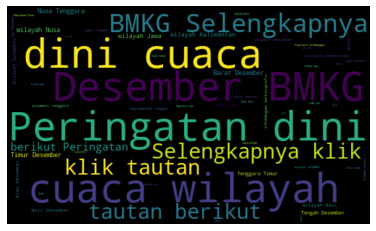

In [17]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"SahabatDikbud, Festival Film Indonesia hadir s...",0.0,0.0,Neutral
1,"SahabatDikbud, kegiatan pembelajaran tatap muk...",0.0,0.0,Neutral
2,"Selamat pagi, SahabatDikbud. Ada tayangan mena...",0.0,0.0,Neutral
3,Kemendikbud raih penghargaan Inovasi Program P...,0.0,0.0,Neutral
4,Selamat memperingati Hari Disabilitas Internas...,0.0,0.0,Neutral
...,...,...,...,...
95,SahabatDikbud pasti tahu binatang apa yang sed...,0.0,0.0,Neutral
96,"_Indonesia: Sobat PKN, ini dia rangkuman keram...",0.0,0.0,Neutral
97,Mendikbud Nadiem Makarim mengapresiasi masyara...,0.0,0.0,Neutral
98,"SahabatDikbud, Mendikbud Nadiem Makarim melaku...",0.0,0.0,Neutral


In [31]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) SahabatDikbud, jangan lewatkan Penutupan PekanKebudayaanNasional 2020 malam nanti yang akan menampilkan Parade Mahakarya Topeng Nusantara dari kawasan percandian Prambanan! Saksikan di  , YouTube  dan .

pkn2020 

2) : [WEBINAR MENGULAS FILM TINGKAT PELAJAR]

SahabatFilm dan SahabatMusik, yuk, ikutan dan daftarkan dirimu melalui tautan…

3) : [INFO MUNASPROK : Pendaftaran Peserta "Seminar Nasional : 75 tahun Indonesia Merdeka Episode 2”]

Dalam rangka Hari Pahl…

4) Info: Tayangan "Game Edutainment" pada pukul 10.00 WIB diganti dengan "Beranda Pak RT".



In [32]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1) Penghargaan ini diterima langsung oleh Mendikbud Nadiem Anwar Makarim pada acara Rapat Koordinasi Nasional Pengadaan Barang/Jasa 2020 di Hotel Grand Savero, Kota Bogor, Jawa Barat, Rabu (18/11/2020). 



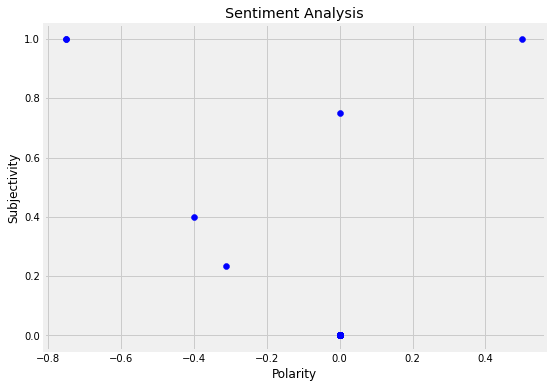

In [33]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [34]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

1.0

In [35]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     95
Negative     4
Positive     1
Name: Analysis, dtype: int64

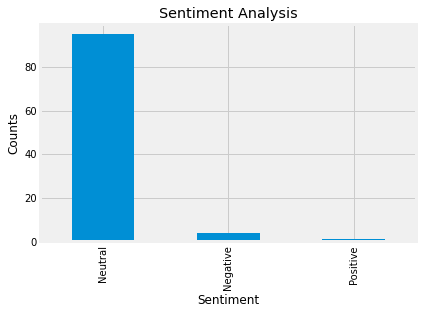

In [36]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

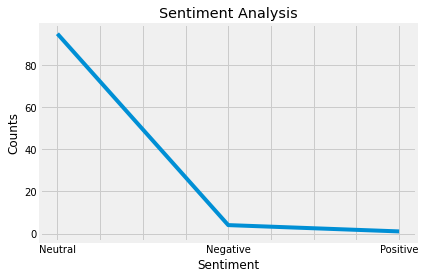

In [37]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()